## Week 5: Further Remarks on Lecture 2

In [2]:
import numpy as np
m = np.ndarray(shape=(5,4),dtype=float)  # unitialized array # The N-dimensional array
print(m)
m[:,:] = 0
m += 5   # take current values of m, increment by 5
#m[1:3,2] = 10 # 1:3 means "from 1 up to but not including 3"
m[0:4,2]=1000
print()
print(m)

[[1.63920863e-316 1.64135880e-316 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]]

[[   5.    5. 1000.    5.]
 [   5.    5. 1000.    5.]
 [   5.    5. 1000.    5.]
 [   5.    5. 1000.    5.]
 [   5.    5.    5.    5.]]


In [3]:
m = np.ndarray(shape=(10000,10000),dtype=float)  # unitialized array # The N-dimensional array
m[:,:] = 0
m += 5   
m[0:4,2]=1000
print ('1st and 2nd rows foo\n')
print (m[:2,:3])


1st and 2nd rows foo

[[   5.    5. 1000.]
 [   5.    5. 1000.]]


In [4]:
m=[]

In [5]:
def square(x):
    n1=10000
    n2=10000
    m = np.ndarray(shape=(n1,n2),dtype=float) 
    m[:,:] = 0 # It is interesting to run this code with and without this line.
    for i in range(n1):
        for j in range(n2):
            m[i,j] = 2
    m += 5   
    print(m[n1-1,n2-2])
    return x*x

print('test',square(2))

7.0
test 4


More on matrix operations in Week 12, when we discuss linear algebra

### 3D plotting

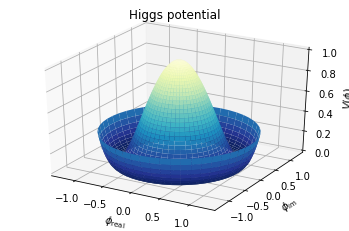

In [8]:
# By Armin Moser
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_title('Higgs potential')
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()

### More information
We will cover plotting in the workshops. In the meantime, matplotlib is extensively documented:
http://matplotlib.org/
In particular, click on "Gallery" and "Examples", where much of this code has come from

## Input and Output

Most of the time, your code will need to process external data -- either entered by a human (through a keyboard), or read from external media. *This is an example abstraction*: you write generic code that is kept separately from the data. 

Let's look at some basic examples

Sometimes you would want to convert to float or int immediately, so can use list comprehension:

In [11]:
s = input('Enter coordinates (x,y,z):')
[x,y,z] = [float(var) for var in (s.split(','))]
print ("x=",x,"y=",y,"z=",z)
print (type(x), type(y), type(z))
print('x squared = ',x**2)

Enter coordinates (x,y,z):1,2,3
x= 1.0 y= 2.0 z= 3.0
<class 'float'> <class 'float'> <class 'float'>
x squared =  1.0


#### Formatted output

In [12]:
for x in range(1, 11):
    print (repr(x).rjust(2), repr(x*x).rjust(3),repr(x*x*x).rjust(4))    # right justification of strings

 1   1    1
 2   4    8
 3   9   27
 4  16   64
 5  25  125
 6  36  216
 7  49  343
 8  64  512
 9  81  729
10 100 1000


You can also zero-pad numbers, e.g. 

In [13]:
print ('-3.14'.zfill(7))

-003.14


In [23]:
import math
s = 'pi = {0:16.3e}'.format(math.pi)
print(s)
print ('The value of PI is approximately {0:07.3f}'.format(math.pi))
#print ('You can also output more digits: {1}'.format(math.pi))
print ('approx {0:07.3f}, more digits: {1}'.format(math.pi,math.pi))

pi =        3.142e+00
The value of PI is approximately 003.142
approx 003.142, more digits: 3.141592653589793


In [24]:
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x{0:x}'.format(i))

Enter integer: 137
The hex representation of the integer is 0x89


For those of you familiar with C (and its *sprintf()* function), you can use old-style formating in python:

In [25]:
print ('The value of PI is approximately %7.3e.' % math.pi)
i = int(input('Enter integer: '))
print ('The hex representation of the integer is 0x%x' % i)

The value of PI is approximately 3.142e+00.
Enter integer: 3
The hex representation of the integer is 0x3


### Reading and writing files

Most often, you would want to read a large dataset, and would want to read it from an external medium. Simplest case is a file on your local disk. Use *open()* function. It returns a file object, and is most commonly used with two arguments: *open(filenamne,mode)*:

In [26]:
%ls -l

total 137
-rw-rw-rw- 1 jovyan jovyan 88524 Sep 23 13:41 Lecture02_furtherRemarks_Python3.ipynb


In [28]:
%ls

f = open('test3.txt', 'w')
print (f)
f.write('Write a line\n')
f.write('Write another line\n')
f.write('Write a number here: ')
f.write(repr(1))
f.write('more and more and more')
f.write('print this line please \n')
#f.write('\n')   # end line (good practice)
f.close()

#%ls

%cat test3.txt

Lecture02_furtherRemarks.ipynb  test3.txt
<open file 'test3.txt', mode 'w' at 0x7f55a180cdb0>
Write a line
Write another line
Write a number here: 1more and more and moreprint this line please 


In [26]:
f = open('test3.txt', 'w')
f.write('some more\n')
f.close()
%cat test3.txt

some more


Most commonly, you would want to write columns of data:

In [29]:
import numpy as np
f = open('test.txt', 'w')
for x in np.arange(0,10,1.5):
    f.write('{0:f}\t {1:f}\t {2:f}\n'.format(x,x**2,-x**3))
f.close()

%cat test.txt

0.000000	 0.000000	 -0.000000
1.500000	 2.250000	 -3.375000
3.000000	 9.000000	 -27.000000
4.500000	 20.250000	 -91.125000
6.000000	 36.000000	 -216.000000
7.500000	 56.250000	 -421.875000
9.000000	 81.000000	 -729.000000


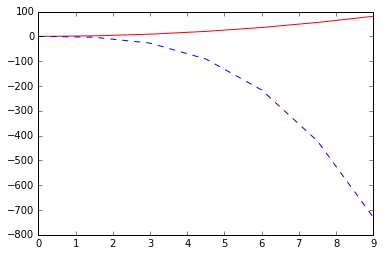

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x, x2, x3 = np.loadtxt('test.txt', unpack = True)
#print(x,x2,x3)
plt.plot(x,x2,'r-',x,x3,'b--')
plt.show()

There is also a more direct, less polished interface for reading data from a file:

In [61]:
f = open('test.txt', 'r')    # open file for reading
#f.write('Try me\n')
s = f.readline()             # read one line (including end-of-line character, '\n')
print (s)                      # print it

0.000000	 0.000000	 -0.000000



In [63]:
s2 = f.readline()            # this will now read the second line
print (s2)

0.200000	 0.040000	 -0.008000



In [64]:
f = open('test.txt', 'rb') # opening the file again will reset the handle to the beginning of the file.NB: binary mode !
f.seek(5)                  # skip 5 bytes (5 characters)
s2 = f.readline()          # read from that point until the end of the line
print (s2)                 # notice trancation 
f.seek(-10, 1)             # go back 10 bytes from the current position (i.e. beginning of next line)
s2 = f.readline()          # notice what is read
print (s2)
f.seek?

b'000\t 0.000000\t -0.000000\n'
b'-0.000000\n'
